<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1</a></span></li></ul></div>

# Problem 1

In the cell below, write a script that:

1. Reads Modis channel 30 (ozone absorbing channel) and Modis Channel 31 (one of the "window" channels) into two numpy arrays (see [Modis channel listing](https://modis.gsfc.nasa.gov/about/specifications.php))

1. Converts them to calibrated radiances using the mid-range wavelength for each channel

1. Calculates the brightness temperature for each channel using the code in the a301.radiation module

1. plots the brightness temperature difference Tbright31 - Tbright30 for your scene

In [30]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt
from a301.utils.data_read import download

In [31]:
get_data=False
if get_data:
    modis_file="ch30_out.hdf"
    download(modis_file)


In [32]:
home = Path.home()
print(home)
data_dir = home / Path("Downloads")
print(data_dir)


/Users/TaylorLee
/Users/TaylorLee/Downloads


In [33]:
hdf_files=list(data_dir.glob("ch30_out.hdf"))
hdf_files
print(data_dir)

/Users/TaylorLee/Downloads


In [34]:
file_name = str(data_dir / Path(hdf_files[0]))
print(f'reading {file_name}')
the_file = SD(file_name, SDC.READ)
stars='*'*50
print((f'\n{stars}\nnumber of datasets, number of attributes'
       f'={the_file.info()}\n{stars}\n'
       f'\nHere is the help file for the info funtion:\n'))
help(SD.info)

reading /Users/TaylorLee/Downloads/ch30_out.hdf

**************************************************
number of datasets, number of attributes=(31, 58)
**************************************************

Here is the help file for the info funtion:

Help on function info in module pyhdf.SD:

info(self)
    Retrieve information about the SD interface.
    
    Args::
    
      no argument
    
    Returns::
    
      2-element tuple holding:
        number of datasets inside the file
        number of file attributes
    
    C library equivalent : SDfileinfo



In [35]:
datasets_dict = the_file.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


In [36]:
longwave_data = the_file.select('EV_1KM_Emissive')
print(longwave_data.info())
help(longwave_data.info)

('EV_1KM_Emissive', 3, [16, 2030, 1354], 23, 8)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo



In [37]:
data_row = longwave_data[0,0,:] 
print(data_row.shape,data_row.dtype)

(1354,) uint16


In [38]:
longwave_data[0,:,:]


array([[ 8472,  8216,  8171, ..., 10238, 10177, 10525],
       [ 8430,  8281,  8191, ..., 10585, 10193, 11014],
       [ 8464,  8599,  8321, ..., 10203,  9569, 10007],
       ...,
       [ 5272,  5069,  5249, ...,  7597,  8402,  7747],
       [ 5161,  4831,  5146, ...,  9095,  9246,  9253],
       [ 5145,  5190,  5689, ...,  9422,  9130,  8517]], dtype=uint16)

In [39]:
pprint.pprint(longwave_data.attributes() )


{'_FillValue': 65535,
 'band_names': '20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36',
 'long_name': 'Earth View 1KM Emissive Bands Scaled Integers',
 'radiance_offsets': [2467.264404296875,
                      2480.6005859375,
                      2478.176513671875,
                      2402.468505859375,
                      1077.44482421875,
                      1560.3333740234375,
                      2724.21826171875,
                      2317.48828125,
                      2610.015380859375,
                      1560.333251953125,
                      2035.9332275390625,
                      2119.08447265625,
                      2500.599365234375,
                      2499.093505859375,
                      2500.5205078125,
                      2495.89111328125],
 'radiance_scales': [6.9307534431573e-05,
                     0.00346690253354609,
                     7.626575097674504e-05,
                     8.990753121906891e-05,
                     3.1556141

In [40]:
pprint.pprint(the_file.attributes()['StructMetadata.0'][:1000])


('GROUP=SwathStructure\n'
 '\tGROUP=SWATH_1\n'
 '\t\tSwathName="MODIS_SWATH_Type_L1B"\n'
 '\t\tGROUP=Dimension\n'
 '\t\t\tOBJECT=Dimension_1\n'
 '\t\t\t\tDimensionName="Band_250M"\n'
 '\t\t\t\tSize=2\n'
 '\t\t\tEND_OBJECT=Dimension_1\n'
 '\t\t\tOBJECT=Dimension_2\n'
 '\t\t\t\tDimensionName="Band_500M"\n'
 '\t\t\t\tSize=5\n'
 '\t\t\tEND_OBJECT=Dimension_2\n'
 '\t\t\tOBJECT=Dimension_3\n'
 '\t\t\t\tDimensionName="Band_1KM_RefSB"\n'
 '\t\t\t\tSize=15\n'
 '\t\t\tEND_OBJECT=Dimension_3\n'
 '\t\t\tOBJECT=Dimension_4\n'
 '\t\t\t\tDimensionName="Band_1KM_Emissive"\n'
 '\t\t\t\tSize=16\n'
 '\t\t\tEND_OBJECT=Dimension_4\n'
 '\t\t\tOBJECT=Dimension_5\n'
 '\t\t\t\tDimensionName="10*nscans"\n'
 '\t\t\t\tSize=2030\n'
 '\t\t\tEND_OBJECT=Dimension_5\n'
 '\t\t\tOBJECT=Dimension_6\n'
 '\t\t\t\tDimensionName="Max_EV_frames"\n'
 '\t\t\t\tSize=1354\n'
 '\t\t\tEND_OBJECT=Dimension_6\n'
 '\t\t\tOBJECT=Dimension_7\n'
 '\t\t\t\tDimensionName="2*nscans"\n'
 '\t\t\t\tSize=406\n'
 '\t\t\tEND_OBJECT=Dimension_7\n'

In [41]:
longwave_bands = the_file.select('Band_1KM_Emissive')


In [42]:
longwave_bands.attributes()


{'long_name': '1KM Emissive Band Numbers for Subsetting'}

In [43]:
band_nums=longwave_bands.get()
print(f'here are the modis channels in the emissive dataset \n{band_nums}')

here are the modis channels in the emissive dataset 
[20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


In [44]:
ch30_index=np.searchsorted(band_nums,30.)
print(ch30_index.dtype)
ch30_index = int(ch30_index)
print(f'channel 30 is located at index {ch30_index}')

int64
channel 30 is located at index 9


In [45]:
ch30_data = longwave_data[ch30_index,:,:]
print(ch30_data.shape)
print(ch30_data.dtype)

(2030, 1354)
uint16


In [46]:
ch31_index=np.searchsorted(band_nums,31.)
print(ch31_index.dtype)
ch31_index = int(ch31_index)
print(f'channel 31 is located at index {ch31_index}')

int64
channel 31 is located at index 10


In [47]:
ch31_data = longwave_data[ch31_index,:,:]
print(ch31_data.shape)
print(ch31_data.dtype)

(2030, 1354)
uint16


In [48]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch30_scale=scales[ch30_index]
ch30_offset=offsets[ch30_index]
print(f'scale: {ch30_scale}, offset: {ch30_offset}')

scale: 0.0004063234373461455, offset: 1560.333251953125


In [49]:
ch30_calibrated =(ch30_data - ch30_offset)*ch30_scale


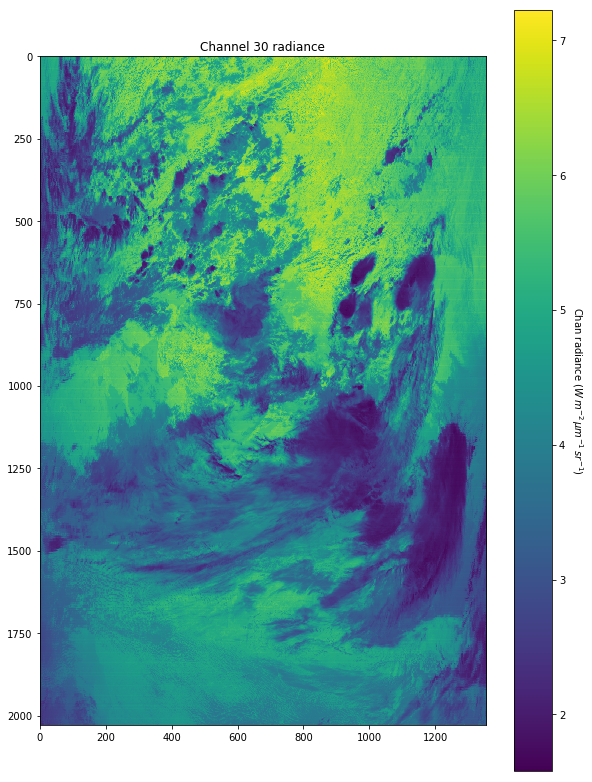

In [50]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_calibrated)
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance')

out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)

In [51]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch31_scale=scales[ch31_index]
ch31_offset=offsets[ch31_index]
print(f'scale: {ch31_scale}, offset: {ch31_offset}')


scale: 0.0006508072256110609, offset: 2035.9332275390625


In [52]:
ch31_calibrated =(ch31_data - ch31_offset)*ch31_scale


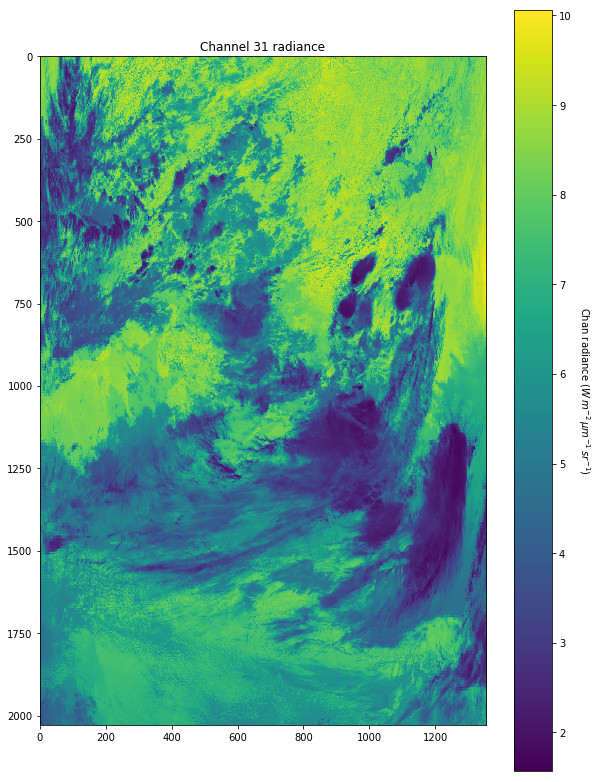

In [53]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch31_calibrated)
cax=fig.colorbar(CS)
ax.set_title('Channel 31 radiance')

out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)

In [54]:
import a301.radiation
from a301.radiation import planck_invert

In [55]:
wavel= 9.73e-6
ch30_radiances=ch30_calibrated*1.e6; 
ch30_Tbright = planck_invert(wavel,ch30_radiances)

In [56]:
wavel= 11.03e-6
ch31_radiances=ch31_calibrated*1.e6; 
ch31_Tbright = planck_invert(wavel,ch31_radiances)

In [57]:
Tbright_difference = ch31_Tbright - ch30_Tbright


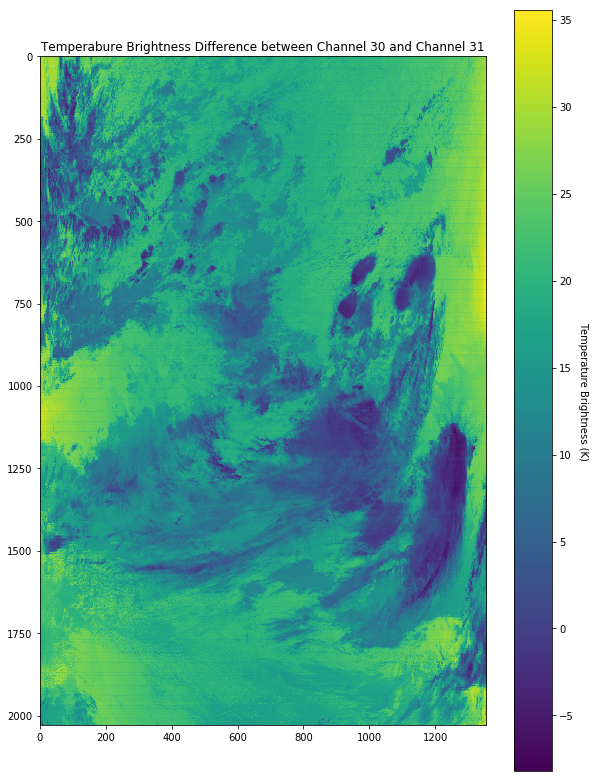

In [58]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(Tbright_difference)
cax=fig.colorbar(CS)
ax.set_title('Temperabure Brightness Difference between Channel 30 and Channel 31')

out=cax.ax.set_ylabel('Temperature Brightness (K)')
out.set_verticalalignment('bottom')
out.set_rotation(270)